In [1]:
import pandas as pd

weather_data = pd.read_csv('weather_data.csv')

print(weather_data.head())

print(weather_data.isnull().sum())

print(weather_data.describe())


       STATION                NAME      DATE  PRCP  TAVG  TMAX  TMIN
0  IN023351400  LUCKNOW AMAUSI, IN  1/1/2016   NaN    59   NaN  42.0
1  IN023351400  LUCKNOW AMAUSI, IN  1/2/2016   NaN    60  77.0  42.0
2  IN023351400  LUCKNOW AMAUSI, IN  1/3/2016   NaN    58  77.0  44.0
3  IN023351400  LUCKNOW AMAUSI, IN  1/4/2016   NaN    58  74.0  43.0
4  IN023351400  LUCKNOW AMAUSI, IN  1/5/2016   NaN    61  78.0  43.0
STATION       0
NAME          0
DATE          0
PRCP       2265
TAVG          0
TMAX       1428
TMIN       1116
dtype: int64
             PRCP         TAVG         TMAX         TMIN
count  818.000000  3083.000000  1655.000000  1967.000000
mean     0.341980    77.590010    90.178248    66.626843
std      0.732151    12.485784    11.821230    13.206978
min      0.000000    45.000000    55.000000    32.000000
25%      0.000000    67.000000    82.000000    55.000000
50%      0.025000    82.000000    92.000000    70.000000
75%      0.350000    87.000000    98.000000    78.000000
max  

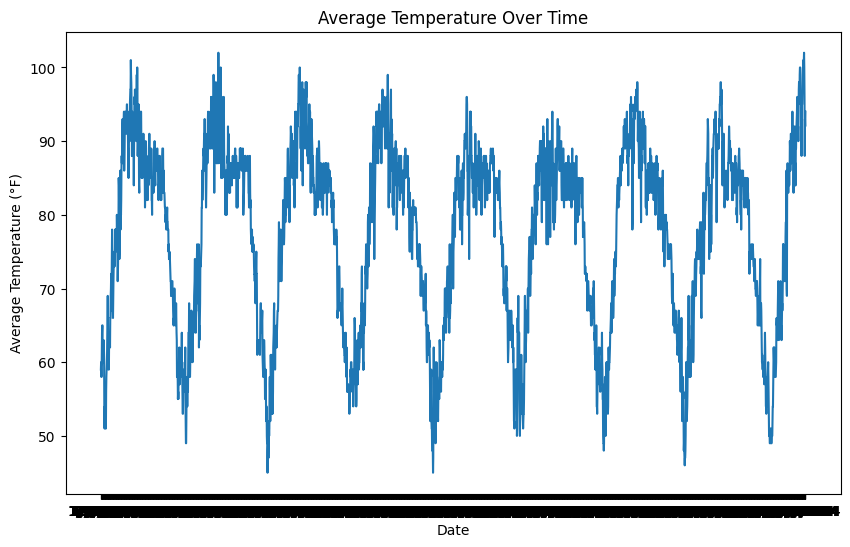

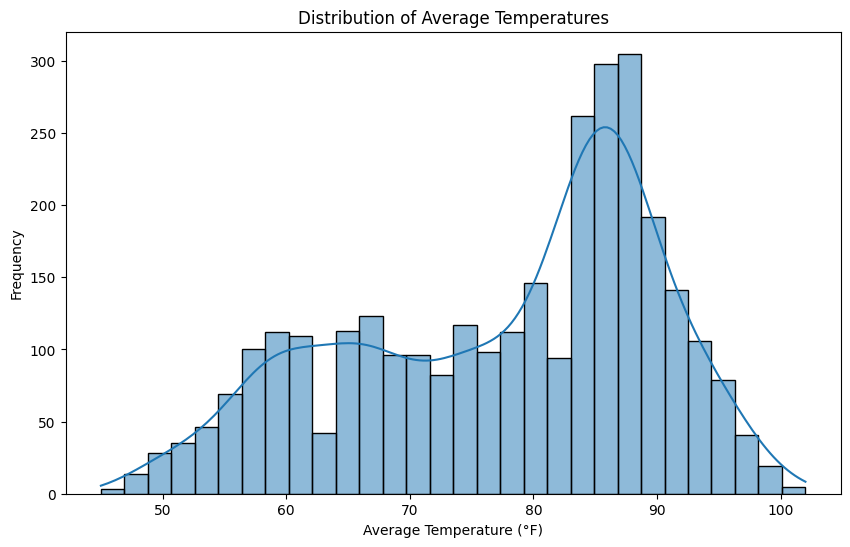

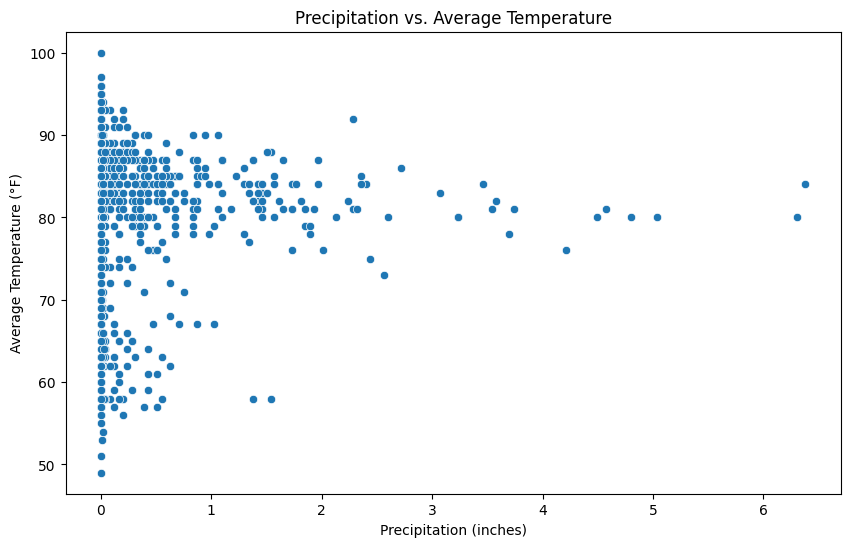

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# temperature trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=weather_data, x='DATE', y='TAVG')
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°F)')
plt.show()

# average temperatures
plt.figure(figsize=(10, 6))
sns.histplot(weather_data['TAVG'], bins=30, kde=True)
plt.title('Distribution of Average Temperatures')
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Frequency')
plt.show()

# precipitation vs. average temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather_data, x='PRCP', y='TAVG')
plt.title('Precipitation vs. Average Temperature')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Average Temperature (°F)')
plt.show()


In [3]:
# date to datetime format
weather_data['DATE'] = pd.to_datetime(weather_data['DATE'])

# year, month, & day as new features
weather_data['Year'] = weather_data['DATE'].dt.year
weather_data['Month'] = weather_data['DATE'].dt.month
weather_data['Day'] = weather_data['DATE'].dt.day

print("\nDataFrame after converting DATE to datetime and extracting Year, Month, and Day:")
print(weather_data.head())

# drop rows with missing values for simplicity
weather_data = weather_data.dropna()

print("\nDataFrame after dropping rows with missing values:")
print(weather_data.head())



DataFrame after converting DATE to datetime and extracting Year, Month, and Day:
       STATION                NAME       DATE  PRCP  TAVG  TMAX  TMIN  Year  \
0  IN023351400  LUCKNOW AMAUSI, IN 2016-01-01   NaN    59   NaN  42.0  2016   
1  IN023351400  LUCKNOW AMAUSI, IN 2016-01-02   NaN    60  77.0  42.0  2016   
2  IN023351400  LUCKNOW AMAUSI, IN 2016-01-03   NaN    58  77.0  44.0  2016   
3  IN023351400  LUCKNOW AMAUSI, IN 2016-01-04   NaN    58  74.0  43.0  2016   
4  IN023351400  LUCKNOW AMAUSI, IN 2016-01-05   NaN    61  78.0  43.0  2016   

   Month  Day  
0      1    1  
1      1    2  
2      1    3  
3      1    4  
4      1    5  

DataFrame after dropping rows with missing values:
         STATION                NAME       DATE  PRCP  TAVG   TMAX  TMIN  \
18   IN023351400  LUCKNOW AMAUSI, IN 2016-01-19  0.01    53   68.0  46.0   
65   IN023351400  LUCKNOW AMAUSI, IN 2016-03-06  0.16    75   93.0  60.0   
74   IN023351400  LUCKNOW AMAUSI, IN 2016-03-15  0.75    71   88.0 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

features = weather_data[['PRCP', 'TMAX', 'TMIN', 'Year', 'Month', 'Day']]
target = weather_data['TAVG']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 5.808963461538459
R-squared: 0.8999679208273895
